In [215]:
import pickle
import numpy as np
from os import walk
import matplotlib.pyplot as plt

In [216]:
def plot_graph(paths, arch_names, start_seeds, end_seeds, image_name="copytask", title="Copytask for T=200"):
    training_losses = {}

    line_colors = ["#663300", "#33cc33","#ff0000", "#660066","#66a3ff"]
    shade_colors = [ "#ffcc99","#c2f0c2","#ff9999", "#ffccff", "#b3d1ff"]

    for idx,path1 in enumerate(paths):
        random_seeds = np.arange(start_seeds[idx],end_seeds[idx])
        training_losses[arch_names[idx]] = []
        path=""
        for seed in random_seeds:
            path = path1+"/"+str(seed)
            for (dirpath, dirnames, filenames) in walk(path):
                for file in filenames:
                    if file.endswith("RNN_Train_Losses") or file.endswith("LSTM_Train_Losses"):                    
                        with open(path+"/"+file, 'rb') as handle:                        
                            losses = pickle.load(handle)
                            training_losses[arch_names[idx]].append(losses)

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 8))
    min_losses = {}

    for idx, arch_name in enumerate(arch_names):
        training_losses_np = np.array(training_losses[arch_name])
        print("\n",arch_name, "\nMin loss for 6 evaluation runs: ", np.amin(training_losses_np, axis=1))
        means = np.mean(training_losses_np, axis=0)
        std_errors = np.std(training_losses_np, axis=0)/np.sqrt(10*800)
        start_std_error = means+std_errors
        end_std_error = means-std_errors
        plt.plot(np.arange(1,801),means,color=line_colors[idx],label=arch_name)
        plt.fill_between(np.arange(1,801),start_std_error,end_std_error, color=shade_colors[idx])

    ax.legend(fontsize='xx-large')
    plt.title(title, fontsize=15)
    plt.xlabel("Iterations", fontsize=30)
    plt.ylabel("Loss", fontsize=30)
    ax.set(ylim=(0, 1))
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20) 
        
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20) 

    plt.savefig("./images/"+image_name)
    plt.show()


 nnRNN-adam 
Min loss for 6 evaluation runs:  [0.02860493 0.07218929 0.03009556 0.05747095 0.02802157 0.04462005]

 nnRNN-RMSProp 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]


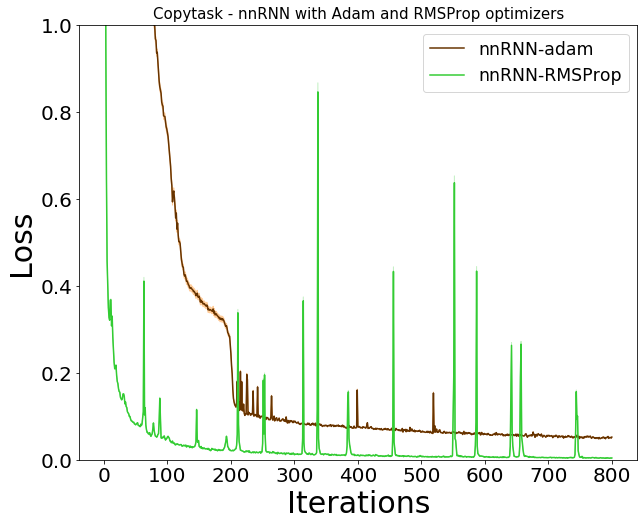

In [227]:
arch_names = ["nnRNN-adam", "nnRNN-RMSProp"]
start_seeds = [920, 360]
end_seeds = [926, 366]
paths = ['./saves/saves-adam/copytask/nnRNN', './saves/nn-rnn-paper-params/copytask/nnRNN']
title = "Copytask - nnRNN with Adam and RMSProp optimizers"
plot_graph(paths, arch_names, start_seeds, end_seeds, arch_names[0], title)


 nnRNN-cayley-initialization 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]

 nnRNN-random-initialization 
Min loss for 6 evaluation runs:  [0.03751167 0.03789432 0.03960103 0.03946199 0.04051093 0.04013419
 0.04260182 0.04253729 0.04310191 0.0421252  0.04026213 0.03891017]


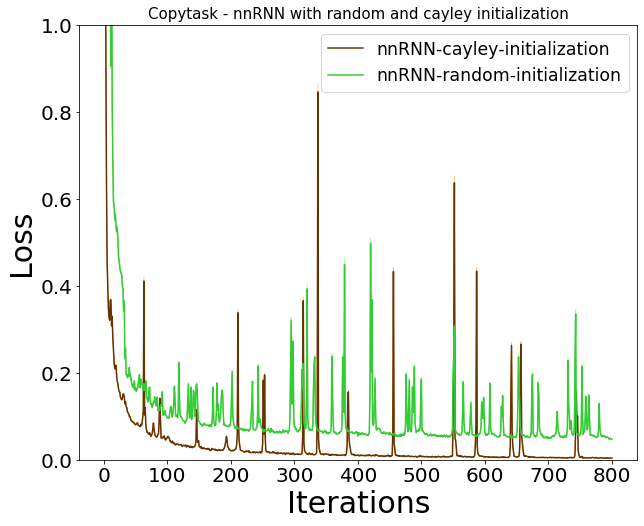

In [226]:
arch_names = ["nnRNN-cayley-initialization","nnRNN-random-initialization"]
start_seeds = [360, 110]
end_seeds = [366,116]
paths = ['./saves/nn-rnn-paper-params/copytask/nnRNN','./saves/saves-rand-init/copytask/nnRNN']
title = "Copytask - nnRNN with random and cayley initialization"
plot_graph(paths, arch_names, start_seeds, end_seeds, arch_names[1], title)


 nnRNN-L1-loss 
Min loss for 6 evaluation runs:  [0.00176957 0.00229583 0.00153883 0.00254136 0.00164771 0.00146049]

 nnRNN-L2-loss 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]


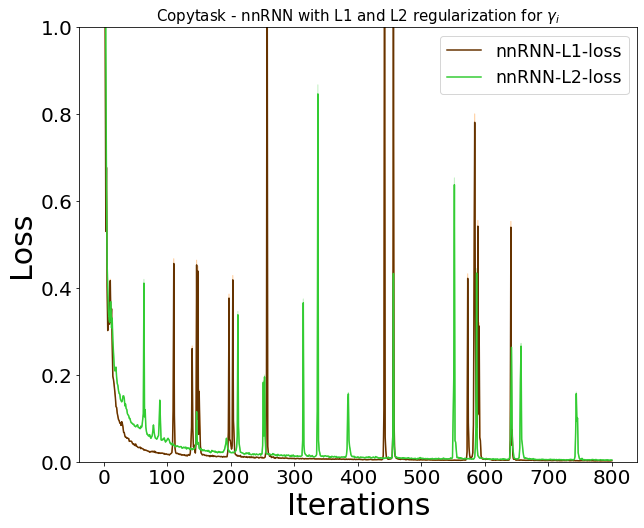

In [225]:
arch_names = ["nnRNN-L1-loss", "nnRNN-L2-loss"]
start_seeds = [300, 360]
end_seeds = [306, 366]
paths = ['./saves/saves-l1-loss/copytask/nnRNN', './saves/nn-rnn-paper-params/copytask/nnRNN']
title = "Copytask - nnRNN with L1 and L2 regularization for $\gamma_i$"
plot_graph(paths, arch_names, start_seeds, end_seeds, arch_names[0], title)


 nnRNN 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]

 nnRNN-nhid-256 
Min loss for 6 evaluation runs:  [0.00135746 0.00181456 0.00177055]


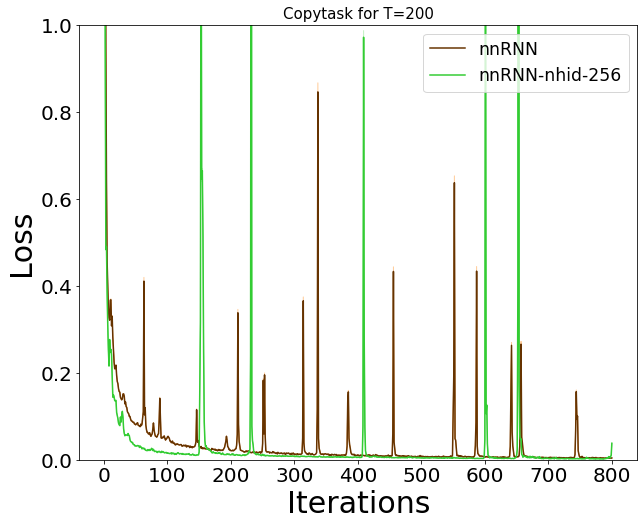

In [221]:
arch_names = ["nnRNN", "nnRNN-nhid-256"]
start_seeds = [360,60]
end_seeds = [366, 64]
paths = ['./saves/nn-rnn-paper-params/copytask/nnRNN', './saves/nhid-256-all-rnns/copytask/nnRNN']
title = "Copytask - nnRNN with hidden size of "
plot_graph(paths, arch_names, start_seeds, end_seeds,arch_names[1])


 nnRNN 
Min loss for 6 evaluation runs:  [0.0025938  0.00305931 0.00272406 0.00221623 0.00267252 0.0031039 ]

 nnRNN-cayley-initialization 
Min loss for 6 evaluation runs:  [0.04345827 0.040894   0.05785261 0.06673161 0.04041864 0.04155604]


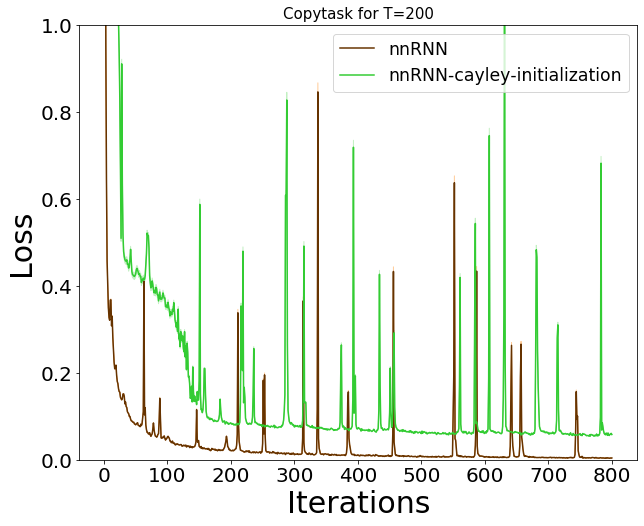

In [222]:
arch_names = ["nnRNN", "nnRNN-cayley-initialization"]
start_seeds = [360, 0]
end_seeds = [366, 6]
paths = ['./saves/nn-rnn-paper-params/copytask/nnRNN',
         './saves/saves-cayley-init/copytask/nnRNN']

plot_graph(paths, arch_names, start_seeds, end_seeds,arch_names[1])

In [223]:
# arch_names = ["nnRNN-l1-loss", "nnRNN", "nnRNN-cayley-initialization", 
#               "nnRNN-random-initialization", "nnRNN-nhid-256"]
# start_seeds = [300, 360, 0, 110, 60]
# end_seeds = [306, 366, 6, 116, 64]
# paths = ['./saves/saves-l1-loss/copytask/nnRNN', './saves/nn-rnn-paper-params/copytask/nnRNN',
#          './saves/saves-cayley-init/copytask/nnRNN', './saves/saves-rand-init/copytask/nnRNN',
#         './saves/nhid-256-all-rnns/copytask/nnRNN']
# plot_graph(paths, arch_names, start_seeds, end_seeds)


 RNN 
Min loss for 6 evaluation runs:  [0.10183726 0.09642754 0.13931277 0.12643945 0.10978118 0.19216652]

 nnRNN 
Min loss for 6 evaluation runs:  [0.06590761 0.0358119  0.05236317 0.06791548 0.03705308 0.04107847]

 LSTM 
Min loss for 6 evaluation runs:  [0.09430295 0.09474348 0.09458065 0.09418175 0.09565111 0.09475224]

 expRNN 
Min loss for 6 evaluation runs:  [0.04338147 0.0453782  0.0429641  0.05178443 0.08753474 0.07701205]


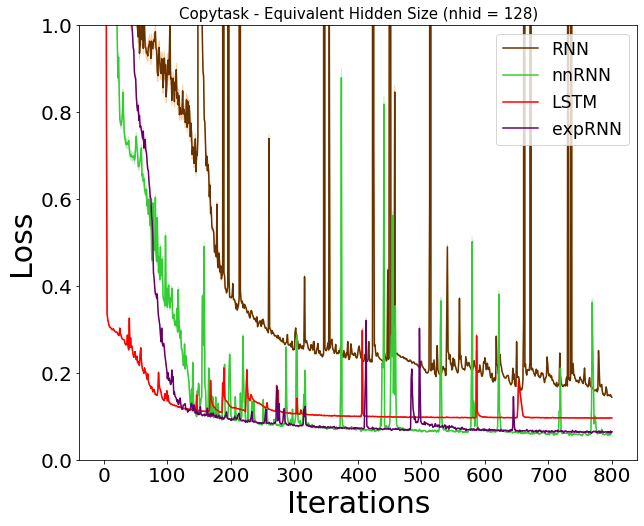

In [224]:
arch_names = ["RNN", "nnRNN", "LSTM", "expRNN"]
start_seeds = [0,0,0,0]
end_seeds = [6,6,6,6]
paths = ['./saves/saves-all-rnns/copytask/RNN/', './saves/saves-all-rnns/copytask/nnRNN/',
         './saves/saves-all-rnns/copytask/LSTM/', './saves/saves-all-rnns/copytask/expRNN/']
plot_graph(paths, arch_names, start_seeds, end_seeds, "copytask-all-rnns", "Copytask - Equivalent Hidden Size (nhid = 128)")

In [181]:
# #New plots
# arch_names = ["RNN", "nnRNN", "expRNN", "LSTM"]
# path2 = './saves/saves-all-rnns'
# plot_graph(0,6, path2, arch_names)